In [1]:
import sys, os
p = os.path.abspath('..')
sys.path.insert(1, p)

pp = os.path.abspath('../../visualization')
sys.path.insert(1, pp)

In [2]:
from gc import collect

from distribution_collector import collect_tag_distributions
from utils.statistics import calculate_gini, calculate_entropy, get_dist_x_div, calc_regression
from distribution_collector import (collect_topic_distributions)
from constants import CONSTANTS

from matplotlib import pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess


In [3]:
tag_info = "../../visualization/result/tag/tag_info.json"
tag_dir = f'../../visualization/{CONSTANTS.tag_difficulty_data_dir[3:]}'
lda_dir = f'../../visualization/{CONSTANTS.lda_difficulty_data_dir[3:]}'
diff_dict = {'0' : 'Basic', '1' : 'Intermediate', '2' : 'Advanced'}
output_dir = './fig/'

In [4]:
print(tag_dir)

../../visualization/result/bert_based/difficulty_annotated/data


In [5]:
bert_topic_distribution = dict()
for diff_str in diff_dict.keys():
    bert_topic_distribution[diff_str] = collect_topic_distributions(window=7,
                                                                data_dir=tag_dir,
                                                                options={'difficulties': [diff_str]})
    

['2021-12-01 00:00:00', '2021-12-08 00:00:00', '2021-12-15 00:00:00', '2021-12-22 00:00:00', '2021-12-29 00:00:00', '2022-01-05 00:00:00', '2022-01-12 00:00:00', '2022-01-19 00:00:00', '2022-01-26 00:00:00', '2022-02-02 00:00:00', '2022-02-09 00:00:00', '2022-02-16 00:00:00', '2022-02-23 00:00:00', '2022-03-02 00:00:00', '2022-03-09 00:00:00', '2022-03-16 00:00:00', '2022-03-23 00:00:00', '2022-03-30 00:00:00', '2022-04-06 00:00:00', '2022-04-13 00:00:00', '2022-04-20 00:00:00', '2022-04-27 00:00:00', '2022-05-04 00:00:00', '2022-05-11 00:00:00', '2022-05-18 00:00:00', '2022-05-25 00:00:00', '2022-06-01 00:00:00', '2022-06-08 00:00:00', '2022-06-15 00:00:00', '2022-06-22 00:00:00', '2022-06-29 00:00:00', '2022-07-06 00:00:00', '2022-07-13 00:00:00', '2022-07-20 00:00:00', '2022-07-27 00:00:00', '2022-08-03 00:00:00', '2022-08-10 00:00:00', '2022-08-17 00:00:00', '2022-08-24 00:00:00', '2022-08-31 00:00:00', '2022-09-07 00:00:00', '2022-09-14 00:00:00', '2022-09-21 00:00:00', '2022-09-2

In [6]:
tag_distribution = dict()
for diff_str in diff_dict.keys():
    print(diff_str)
    tag_distribution[diff_str] = collect_tag_distributions(window=7,
                                                          tag_info = tag_info,
                                                          data_dir=tag_dir,
                                                          options={'difficulties': [diff_str]})
    

0
['2021-12-01 00:00:00', '2021-12-08 00:00:00', '2021-12-15 00:00:00', '2021-12-22 00:00:00', '2021-12-29 00:00:00', '2022-01-05 00:00:00', '2022-01-12 00:00:00', '2022-01-19 00:00:00', '2022-01-26 00:00:00', '2022-02-02 00:00:00', '2022-02-09 00:00:00', '2022-02-16 00:00:00', '2022-02-23 00:00:00', '2022-03-02 00:00:00', '2022-03-09 00:00:00', '2022-03-16 00:00:00', '2022-03-23 00:00:00', '2022-03-30 00:00:00', '2022-04-06 00:00:00', '2022-04-13 00:00:00', '2022-04-20 00:00:00', '2022-04-27 00:00:00', '2022-05-04 00:00:00', '2022-05-11 00:00:00', '2022-05-18 00:00:00', '2022-05-25 00:00:00', '2022-06-01 00:00:00', '2022-06-08 00:00:00', '2022-06-15 00:00:00', '2022-06-22 00:00:00', '2022-06-29 00:00:00', '2022-07-06 00:00:00', '2022-07-13 00:00:00', '2022-07-20 00:00:00', '2022-07-27 00:00:00', '2022-08-03 00:00:00', '2022-08-10 00:00:00', '2022-08-17 00:00:00', '2022-08-24 00:00:00', '2022-08-31 00:00:00', '2022-09-07 00:00:00', '2022-09-14 00:00:00', '2022-09-21 00:00:00', '2022-09

In [7]:
b_gini_dict, b_entropy_dict = dict(), dict()
for diff_str, topic_distribution in bert_topic_distribution.items():
    b_entropy_dict[diff_str] = list(map(lambda x: calculate_entropy(list(x.values())), topic_distribution))
    b_gini_dict[diff_str] = list(map(lambda x: calculate_gini(list(x.values())), topic_distribution))
    


In [8]:
t_gini_dict, t_entropy_dict = dict(), dict()
for diff_str, distribution in tag_distribution.items():
    t_entropy_dict[diff_str] = list(map(lambda x: calculate_entropy(list(x.values())), distribution))
    t_gini_dict[diff_str] = list(map(lambda x: calculate_gini(list(x.values())), distribution))
    


In [9]:
b_coef_dict = dict()
b_coef_dict[0] = b_gini_dict
b_coef_dict[1] = b_entropy_dict

In [17]:
alpha_dict = {0 : 'A. ', 1  : 'B. ', 2 : 'C. '}

In [10]:
t_coef_dict = dict()
t_coef_dict[0] = t_gini_dict
t_coef_dict[1] = t_entropy_dict

In [20]:
def draw_scatter_line_plot(dict_):
    
    v_size = len(dict_[0].keys())
    calc_type_dict = { 0 : 'Gini Coefficient', 1 : 'Entropy'}

    fig, axs = plt.subplots(nrows=1, ncols=v_size,  figsize = (20, 6), sharey=True, sharex=True)
    coef_dict = dict_[0]
    for v_idx in coef_dict.keys():
        list_ = coef_dict[v_idx]
        x_rel, divider = get_dist_x_div(list_)
        reg_bf = calc_regression(x_rel[:divider], list_[:divider])
        reg_af = calc_regression(x_rel[divider:], list_[divider:])

        h_idx, v_idx = 0, int(v_idx)
        axs[v_idx].scatter(x_rel, list_, color = 'darkgray', alpha = 0.7,  s=10, marker='x')
        axs[v_idx].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
        axs[v_idx].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10)
        axs[v_idx].set_ylabel(f"{calc_type_dict[h_idx]}", fontsize = 10)
        axs[v_idx].set_title(f"{alpha_dict[v_idx]}{diff_dict[str(v_idx)]} Level")
        axs[v_idx].plot(x_rel[:divider], reg_bf(x_rel[:divider]), linewidth=2, label = 'pre-chatGPT')
        axs[v_idx].plot(x_rel[divider:], reg_af(x_rel[divider:]), linewidth=2, label = 'post-chatGPT')
        axs[v_idx].legend(frameon=False, loc='best')
        axs[v_idx].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    

    fig, axs = plt.subplots(nrows=1, ncols=v_size,  figsize = (20, 6), sharey=True, sharex=True)
    coef_dict = dict_[1]
    for v_idx in coef_dict.keys():
        list_ = coef_dict[v_idx]
        x_rel, divider = get_dist_x_div(list_)
        reg_bf = calc_regression(x_rel[:divider], list_[:divider])
        reg_af = calc_regression(x_rel[divider:], list_[divider:])

        h_idx, v_idx = 1, int(v_idx)
        print(h_idx, v_idx)
        axs[v_idx].scatter(x_rel, list_, color = 'darkgray', alpha = 0.7,  s=10, marker='x')
        axs[v_idx].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
        axs[v_idx].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10)
        axs[v_idx].set_ylabel(f"{calc_type_dict[h_idx]}", fontsize = 10)
        axs[v_idx].set_title(f"{alpha_dict[v_idx]}{diff_dict[str(v_idx)]} Level")
        axs[v_idx].plot(x_rel[:divider], reg_bf(x_rel[:divider]), linewidth=2, label = 'pre-chatGPT')
        axs[v_idx].plot(x_rel[divider:], reg_af(x_rel[divider:]), linewidth=2, label = 'post-chatGPT')
        axs[v_idx].legend(frameon=False, loc='best')
        axs[v_idx].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

        
        plt.savefig(f"{output_dir}Result_Fig6.png", dpi=300, bbox_inches='tight')


1 0
1 1
1 2


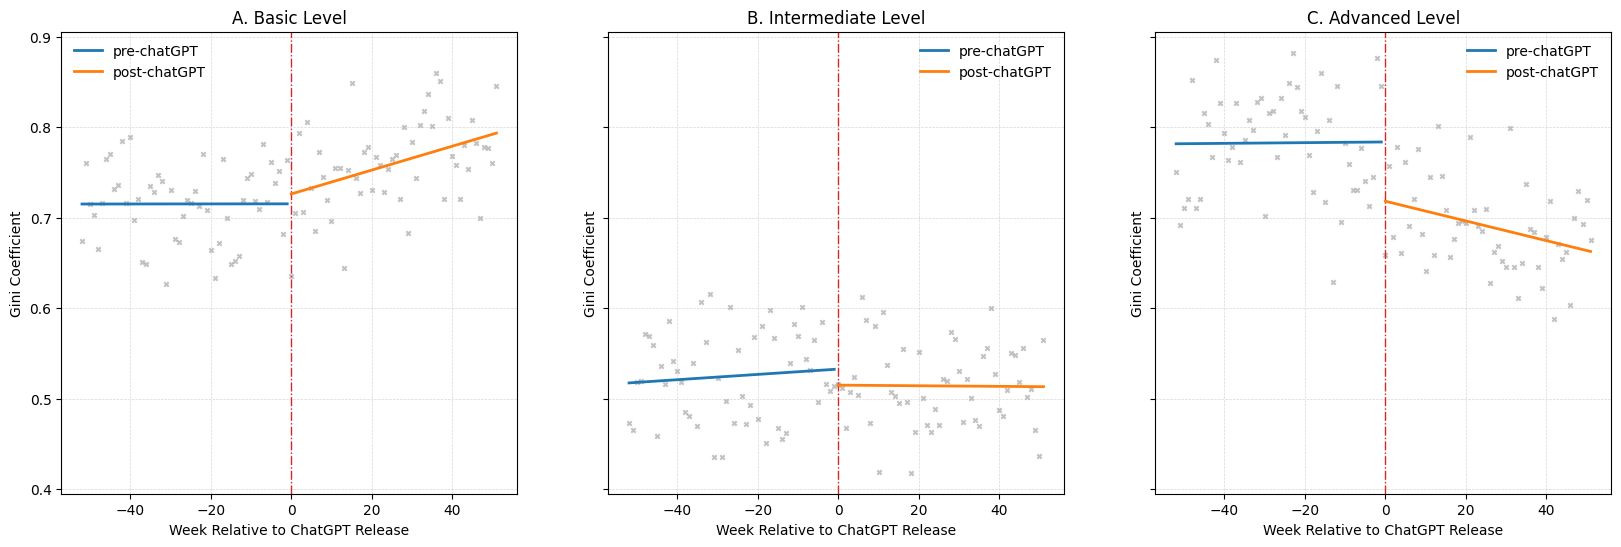

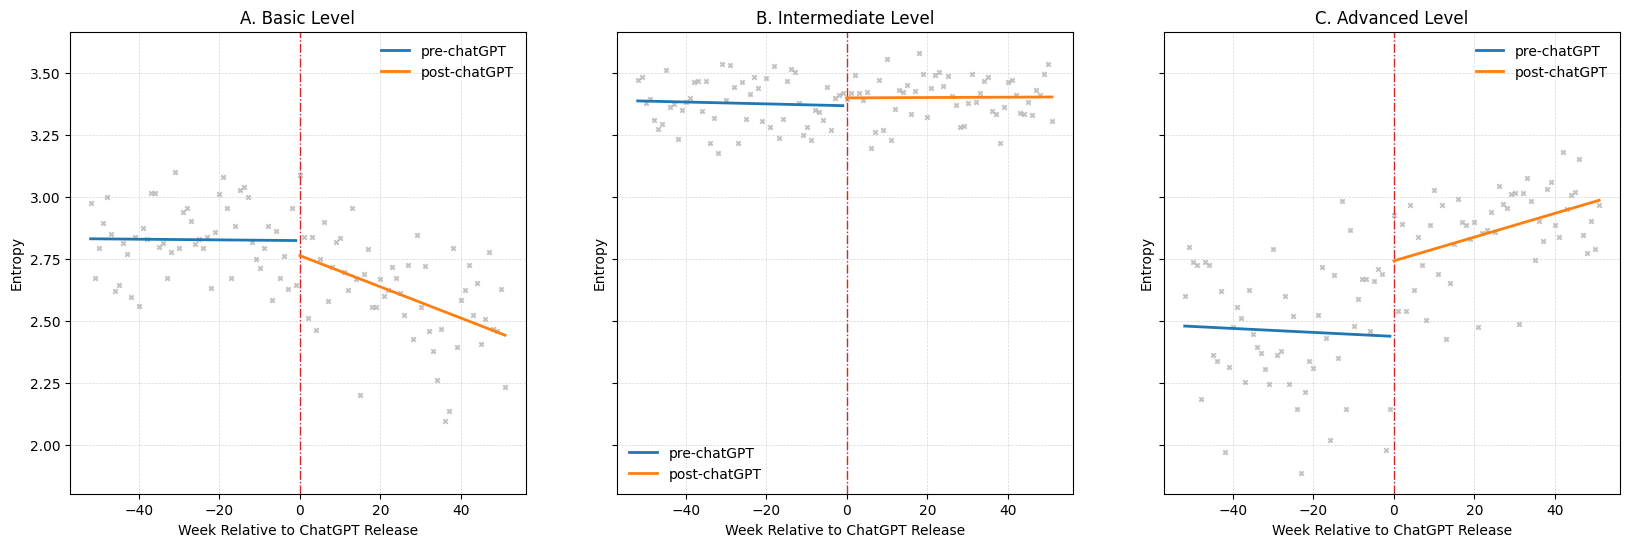

In [21]:
draw_scatter_line_plot(b_coef_dict)

1 0
1 1
1 2


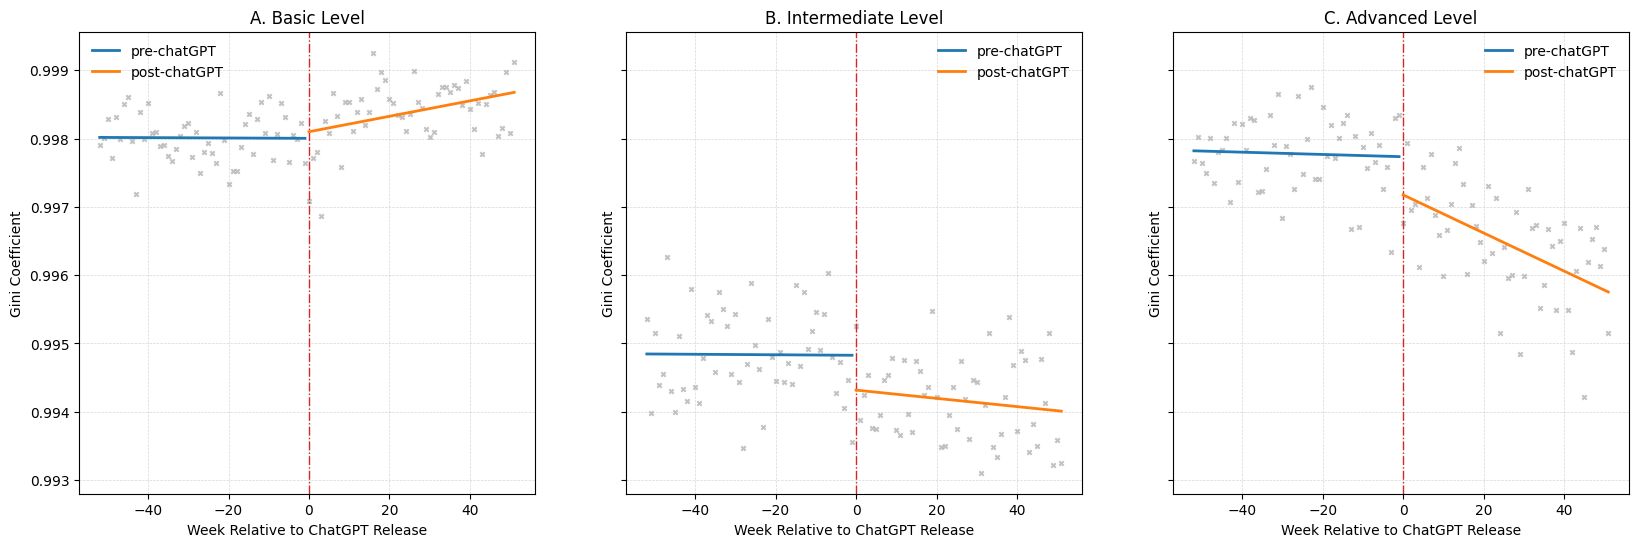

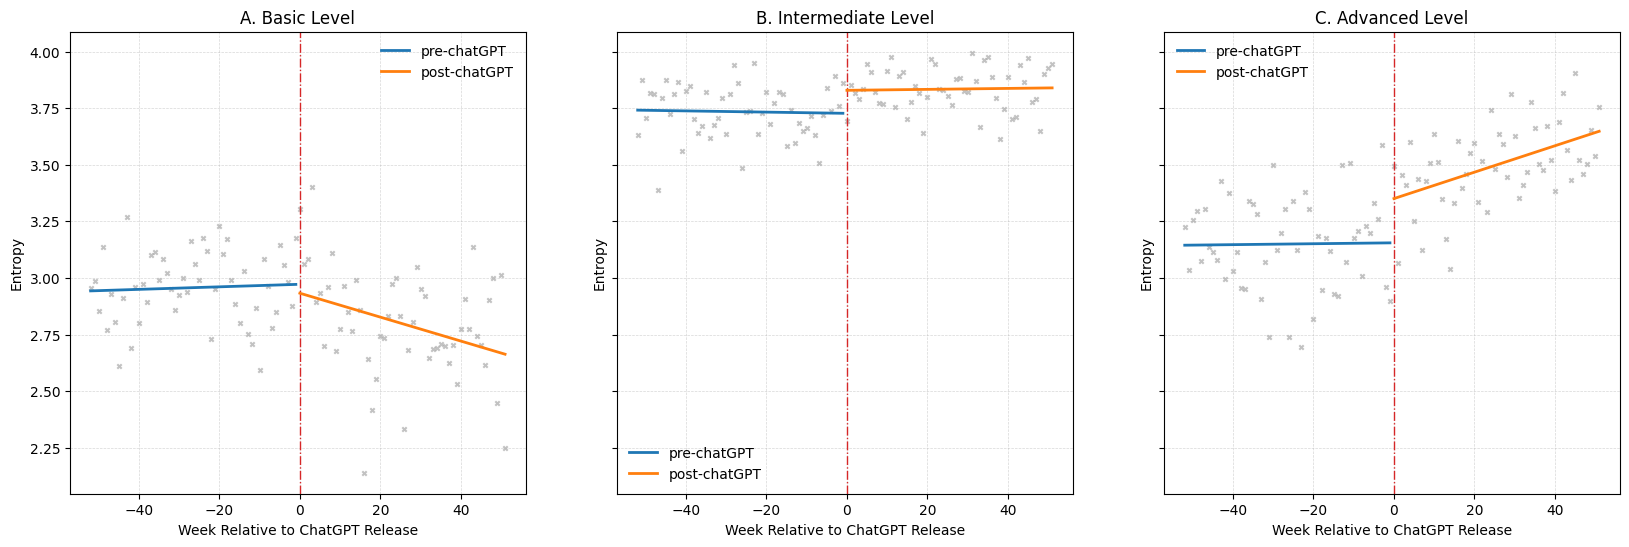

In [22]:
draw_scatter_line_plot(t_coef_dict)

In [14]:
t_coef_dict[1]['0']

[2.955657456466705,
 2.9885211209524263,
 2.8541799461464037,
 3.1363875752820345,
 2.7696157054893753,
 2.929907497780026,
 2.8032699568681365,
 2.6109604898993766,
 2.9099028591879232,
 3.2704571639905593,
 2.6898754843453623,
 2.9579701050101486,
 2.8012245331608345,
 2.973601214077407,
 2.8949316510144474,
 3.1028679307267075,
 3.1156851740341396,
 2.989743237740323,
 3.08395823385741,
 3.0227165197230503,
 2.953066459814794,
 2.8567247414726467,
 2.923938577093373,
 2.9990129202295908,
 2.937700318345289,
 3.164805051049857,
 3.0618766161318085,
 2.9900233221433212,
 3.178015871349217,
 3.1185674273089963,
 2.7303466706987134,
 2.9496752076785007,
 3.2285560994186935,
 3.1045565271923543,
 3.1728930462366898,
 2.993042638377803,
 2.883547748408005,
 2.798663866016559,
 3.031610398211593,
 2.751810856708869,
 2.7071722156971165,
 2.865066301596633,
 2.592272793428251,
 3.0857470677116536,
 2.9631671315377237,
 2.777234091560524,
 2.851252964479797,
 3.1433296198170613,
 3.055095902

In [15]:
t_coef_dict[1]['1']

[3.6299075091591733,
 3.8737523427240235,
 3.7074111074740426,
 3.819034786216889,
 3.814774577950385,
 3.38946820120814,
 3.794279562545656,
 3.8751611169291533,
 3.7260244483650387,
 3.8131163313127563,
 3.867713679308785,
 3.562118798674487,
 3.824716727528948,
 3.848547949611584,
 3.702526563602883,
 3.640374097212045,
 3.6704655515473514,
 3.820766992236483,
 3.616543477291276,
 3.6758008816173233,
 3.706818065571075,
 3.7934987258321504,
 3.6352137971323457,
 3.8114252142936973,
 3.940030767467821,
 3.860952185571761,
 3.4869076024141474,
 3.733346026282164,
 3.735956897829224,
 3.9486433576484457,
 3.636456602713092,
 3.7287765733723934,
 3.8233261308282813,
 3.6802064471325115,
 3.774845061726455,
 3.823177782342667,
 3.813608609395461,
 3.5845910100535145,
 3.7402273072097776,
 3.59720601455394,
 3.686574304847293,
 3.648275321142994,
 3.662332280570389,
 3.7142679199970527,
 3.632600321399382,
 3.5055825516795336,
 3.7177165399184773,
 3.840597444599127,
 3.7358473587380487,
